### Imports

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Needed functions

In [22]:
def load_rsr_data(data_dir):
    """
    Load the single VIIRS DNB RSR file into a DataFrame.
    """
    filepath = os.path.join(
        data_dir,
        'GT_F1_DNB_RSR_Release1.0_Best_DNBLGS_v3_ib_oob.txt_PO'
    )
    df = pd.read_csv(
        filepath,
        delim_whitespace=True,
        comment='#',
        header=None,
        names=['Band', 'Det_PO', 'subsample', 'wavelength_nm', 'RSR']
    )
    return df

def convert_to_um(df):
    """
    Convert the wavelength column from nanometers to micrometers.
    """
    df = df.copy()
    df['wavelength_um'] = df['wavelength_nm'] / 1000.0
    return df

def compute_average_rsr(df):
    """
    Compute the average RSR across all detectors at each wavelength.
    """
    avg_df = df.groupby('wavelength_um')['RSR'].mean().reset_index()
    return avg_df

def plot_average_rsr(avg_df):
    """
    Plot the average RSR as a function of wavelength in micrometers.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(avg_df['wavelength_um'], avg_df['RSR'], label='Average RSR')
    plt.xlabel('Wavelength (µm)')
    plt.ylabel('Relative Spectral Response (unitless)')
    plt.title('Average VIIRS DNB RSR Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def integrate_bandwidth(avg_df):
    """
    Integrate the average RSR over wavelength to get the effective bandwidth.
    Uses the vector multiplication.
    """
    bandwidth = avg_df['RSR'].values[:-1] @ avg_df['wavelength_um'].diff().values[1:]
    return bandwidth


### Plot

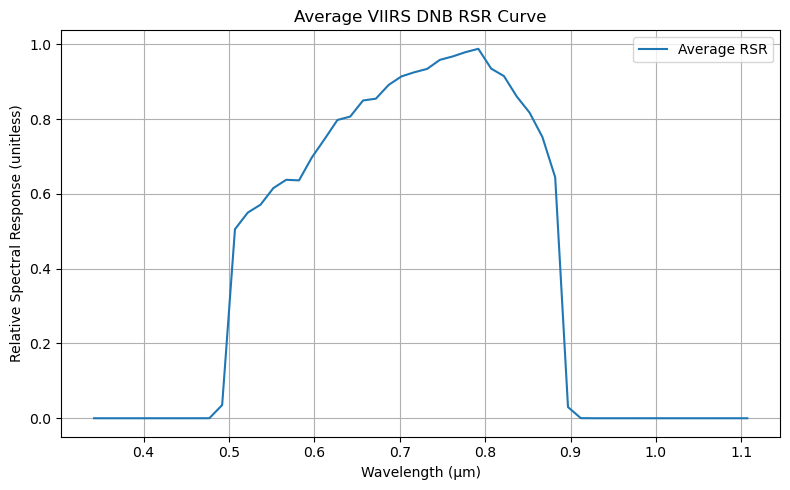

Effective bandwidth (Δλ_eff): 0.3122 µm


In [23]:
data_dir = 'data'  # Folder containing your RSR text files
# 1. Load all detector products
raw_df = load_rsr_data(data_dir)
# 2. Convert wavelengths to micrometers
conv_df = convert_to_um(raw_df)
# 3. Compute and plot the average distribution
avg_df = compute_average_rsr(conv_df)
plot_average_rsr(avg_df)
# 4. Integrate over the average function
bw_eff = integrate_bandwidth(avg_df)
print(f'Effective bandwidth (Δλ_eff): {bw_eff:.4f} µm')